#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your dataset
df = pd.read_csv('content/Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Task 1: Basic Data Exploration
I used `df.info()` for basic data exploration as it outputs most of the essential information I need to have an overview of the data, its dimentions, data types of each column and missing values.
1. **Number of rows**: 148654
2. **Number of columns**: 13
3. **Data Type of each column**: Expressed in the output of the first cell **(C1)** below & can be explicitly accessed using `df.dtypes`
4. **Missing Values**: from the number of non-null elements in each row, it is clear that columns `BasePay`, `OvertimePay`, `OtherPay`, `Benefits`, `Notes`,and `Status` have missing values as the number of non-null elements is less that the total number of elements (number of rows). In order to know the exact number of missing values per column I used `df.isna().sum()` in **(C2)**. It is clear that both `Notes` and `Status` Columns are Empty.

In **(C3)** I executed `df.nunique()` to know the number of unique elements in each column, especially the non-numerical column. I deduced from the output that each entry (Employee) has his unique ID, hence supposidely there is no duplicate data and I can use The `ID` column as The Index of the Dataframe. In addition, The data is only from four years **2011->2014**, and from one Agency which is **San Francisco**.
In **(C4)** I Changed the Type of `JobTitle` and `Agency` Columns to Catigorical and set the index of the dataframe to be `ID`. 

In [3]:
# C1
#--------
# I used this command to conduct basic data exploration
#--------------------------------------------------------
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [4]:
# C2
#------
# I used this command to output the number of missing values for each column
#-----------------------------------------------------------------------------
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [5]:
# C3
#-----
# I used this command to know the number of unique elements in each column (specially the categorical)
#---------------------------------------------------------------------------------------------------------
df.nunique()

Id                  148654
EmployeeName        110811
JobTitle              2159
BasePay             109489
OvertimePay          65998
OtherPay             83225
Benefits             98465
TotalPay            138486
TotalPayBenefits    142098
Year                     4
Notes                    0
Agency                   1
Status                   0
dtype: int64

In [6]:
# C4
#-----
# Depending on the output of the prvious cell in addition to convention I changed the data types of some columns and Set Id as the index
#-------------------------------------------------------------------------------------------------------------------------------------------
df[["JobTitle", "Agency"]] = df[["JobTitle", "Agency"]].astype("category")
df.set_index("Id", inplace=True)

# Task 2: Describtive Statistics


In **(C5)**, I calculated basic summary statistics for the numerical columns of the dataframe using `df.describe()` method and I extracted the following info about the `TotalPay (Salary)`:
1. **Average Salary (mean)**: 74768.321972
2. **Median Salary**: 71426.610000
3. **Mode Salary**: 0
4. **Minimum Salary**: -618.13 
5. **Maximum Salary**: 567595.430000
6. **Standard deviation**: 50517.005274	

In [7]:
# C5
#------
display(df.describe()) # Outputs all basic summary statistics (except mode) for numerical columns
display(df.mode()) # Outputs the mode for each column
df[["JobTitle", "Agency"]].describe() # Outputs summary statistics for the categorical columns like the most frequent element and number of unique elements etc.

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,Kevin Lee,Transit Operator,0.0,0.0,0.0,0.0,0.0,7959.18,2014,NaN,San Francisco,NaN


,JobTitle,Agency
count,148654,148654
unique,2159,1
top,Transit Operator,San Francisco
freq,7036,148654


# Task 3: Data Cleaning
The Task is to handle the missing data, so that's what I will be mainly focusing on. I followed multiple steps to get red of missing data either through dropping of imputation; the steps is as follows:
1. **Number of missing values per column**: First in **(C6)** I reprinted the number of missing values for each column to decide which columns I will tackle.
2. **`Notes` and `Agency` columns**: These two columns are totally empty and there is no way to fill the missing data with any value so the best choice is to drop these two column which is what I've done in **(C7)**.
3. **`OvertimePay` and `OtherPay` columns**: There were only 4 values missing in each column, and it turned out to be the same 4 rows, after checking these 4 rows in **(C8)** it is clear that these 4 rows contain no data entries at all so I droped these 4 rows in **(C9)**.
4. **`Benefits` Column**: There are 36159 missing values in the `Benifits` Column at that point which is great number; a common solution in similar cases would be to impute the missing values with the mean or the median of the column, **HOWEVER**, this is not the best practice here, as we can easily spot the realtion between the numerical Columns (`Benefits`, `TotalPay`, `TotalPayBenefits`) where we can use `Benefits = TotalPayBenefits - TotlaPay` to impute missing values in the `Benefits` column which is what I did in **(C10)**, especially that both `TotalPayBenefits` and `TotalPay` columns have no missing values.
5. **`BasePay` Column**: Similar to what is done with the missing values in `Benefits` column, I used the equation `BasePay = TotalPay - (OvertimePay + OtherPay)` in **(C11)**.

After the previous steps I cleaned all the missing data, which is what was required in the task, however, Data Cleaning isn't only about missing data; there are other aspects that shouldn't be overlooked. For example the `JobTitle` Column, this column ,which shall represent different Job Categories or departments, contains a massive number of unique values (2159) which is a computational nightmare when trying to study the relation between salaries and different departments, especially that not all these 2159 values represent different department, but things like ranks or title representation give such illusion (probably because the data in this column was collected through text prompts). So, With the aim of reducing the number of categories in the `JobTitle` column for better analysis of the data, I will create a new Column `Department` to represent the department or group to which each job title belongs. To achieve this goal I conducted the following steps:
1. **Uniformalize Data (C12)**: I made all elements in the `JobTitle` uppercase.
2. **CountVectorizer to extract departments (C13)**: I used CountVectorizer to extract words with greatest frequency with the hope of extracting department names like "police" department, or "fire" department, etc...
3. **TfidfVectorizer (C14, C15)**: I used the TfidfVectorizer for the same purpose of using CountVectorizer, but with different algorithm. In addition, using TfidfVectorizer I extracted elements of length 2 words for better interpretation of the departments.
4. **Extracting Departments (C16)**: I used the output of the previous cells to brain storm 11 departments or so, and then I gathered all possible substring that would be found in the job describtion of each department, then I created departments list and coditions list to use them with `np.select` in order to construct the new `Departments` Column.

**Note**: Even after this process their remains about 44% of job titles assigned to Others (not assigned to specific department) (as shown is **(C17)**) which implies that further NLP proccesses shall be conducted, however, as far as my fundemental NLP knowledge extends, this was my product.

**Note**: Thier remains some things overlooked like numerical data boundries and outliers; I noticed in the summary statistics (task 2) and **(C18)** that some employees have negative pay values and alot of emplyees have a salary very close to zero which doesn't seem right, however due to the lack of context I can't interpret these value as wrong especially that these values aren't considered outliers from statistical point view to this dataset, but I felt that I should piont this out. 


In [8]:
# C6
#-----
# Output the number of missing values in each column
#-----------------------------------------------------
df.isna().sum()

EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [9]:
# C7
#------
# Dropping "Notes" and "Status" Columns
#---------------------------------------- 
df.drop(columns=["Notes", "Status"], inplace=True)
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
Id,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco


In [10]:
# C8
#-----
# Checking the 4 missing elements in "OvertimePay" and "OtherPay" columns
#-----------------------------------------------------------------------
df.loc[np.logical_or(df["OvertimePay"].isna(), df["OtherPay"].isna())]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
Id,,,,,,,,,,
148647,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco


In [11]:
# C9
#-----
# dropping the 4 missing rows in "OvertimePay" and "OtherPay" columns
#-----------------------------------------------------------------------
df.dropna(subset=["OvertimePay", "OtherPay"], inplace=True)
df.isna().sum()

EmployeeName            0
JobTitle                0
BasePay               605
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [12]:
# C10
#-----
# imputed the missing values in "Benefits" using "Benefits" == "TotalPayBenefits" - "TotalPay" equation
#----------------------------------------------------------------------------------------------------------
df["Benefits"].fillna(df["TotalPayBenefits"]-df["TotalPay"], inplace=True)
df.isna().sum()

EmployeeName          0
JobTitle              0
BasePay             605
OvertimePay           0
OtherPay              0
Benefits              0
TotalPay              0
TotalPayBenefits      0
Year                  0
Agency                0
dtype: int64

In [13]:
# C11
#-----
# imputed the missing values in "BasePay" using "BasePay" == "TotalPay" - ("OvertimePay" + "OtherPay") equation
#---------------------------------------------------------------------------------------------------------------
df["BasePay"].fillna(df["TotalPay"] - (df["OvertimePay"] + df["OtherPay"]), inplace=True)
df.isna().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

In [14]:
# C12
#------
# I made all "JobTitle" column uppercase
#---------------------------------------- 
df["JobTitle"] = df["JobTitle"].str.upper()

In [15]:
# C13
#------
# I used CountVectorizer to find most frequent words (possibly departments) 
#---------------------------------------------------------------------------- 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=0.02, max_df=0.9)
cv_transformed = cv.fit_transform(df["JobTitle"])
cv_transformed.toarray()
cv.get_feature_names_out()

array(['aide', 'analyst', 'assistant', 'clerk', 'custodian', 'deputy',
       'engineer', 'firefighter', 'health', 'ii', 'iii', 'manager',
       'nurse', 'officer', 'operator', 'police', 'public', 'recreation',
       'registered', 'senior', 'service', 'sheriff', 'special',
       'supervisor', 'svc', 'transit', 'worker'], dtype=object)

In [16]:
# C14
#------
# I used TfidfVectorizer to find most frequent elements (possibly departments) of length 1 or 2 
#-----------------------------------------------------------------------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=50,ngram_range=(1,2), stop_words='english')
tv_transformed = tv.fit_transform(df["JobTitle"])
tv_transformed.toarray()
tv.get_feature_names_out()

array(['administrative', 'administrative analyst', 'aide', 'aide public',
       'analyst', 'assistant', 'care', 'clerk', 'custodian', 'deputy',
       'deputy sheriff', 'eligibility', 'eligibility worker', 'eng',
       'engineer', 'firefighter', 'health', 'ii', 'iii', 'inspector',
       'leader', 'manager', 'nurse', 'officer', 'operator', 'patient',
       'police', 'police officer', 'public', 'public service',
       'public svc', 'public works', 'recreation', 'recreation leader',
       'registered', 'registered nurse', 'senior', 'service', 'services',
       'sheriff', 'special', 'special nurse', 'specialist', 'supervisor',
       'svc', 'svc aide', 'transit', 'transit operator', 'worker',
       'works'], dtype=object)

In [17]:
# C15
#------
# I used TfidfVectorizer to find most frequent elements (possibly departments) of length 1 or 2 
#-----------------------------------------------------------------------------------------------
tv2 = TfidfVectorizer(max_features=50, ngram_range=(2,2),stop_words='english')
tv2_transformed = tv2.fit_transform(df["JobTitle"])
tv2_transformed.toarray()
tv2.get_feature_names_out()

array(['account clerk', 'administrative analyst', 'aide public',
       'arch eng', 'attorney civil', 'business analyst', 'care assistant',
       'civil criminal', 'clerk typist', 'control officer', 'court clerk',
       'deputy sheriff', 'electrical transit', 'eligibility worker',
       'emt paramedic', 'eng plng', 'food service', 'general laborer',
       'health worker', 'library page', 'licensed vocational',
       'museum guard', 'nurse practitioner', 'officer iii',
       'paramedic firefighter', 'parking control', 'patient care',
       'physician specialist', 'police officer', 'protective services',
       'ps aide', 'public service', 'public svc', 'public works',
       'recreation leader', 'registered nurse', 'senior administrative',
       'senior clerk', 'senior eligibility', 'service aide',
       'service trainee', 'service worker', 'services worker',
       'social worker', 'special nurse', 'stationary engineer',
       'svc aide', 'transit operator', 'transit supervis

In [18]:
# C16
#------
#+-----------------------------------------------+
#| df["jobTitle"].str.contains(..) -> Department |
#+-----------------------------------------------+
#TRANSIT -> TRANSPORTATION
#RECREATION -> RECREATION
#ANALYS|DATA -> DATA ANALYSIS
#FIRE -> FIRE
#WATER -> WATER
#OFFICER|SERGEANT|LIEUTENANT|CAPTAIN|MAJOR|CHIEF|POLICE -> POLICE
#ENG|MECHANIC -> ENGINEERING
#MEDICAL|DOCTOR|NURSE|PHYSICIAN|SURGEON|PHARMA|PARAMEDIC|DENTIST|THERAPIST|MIDWIFE|VOCATION -> MEDICAL
#LAWYER|ATTORNEY|PROSECUTOR|JUDGE|PARALEGAL|LEGAL|SOLICITOR|ADVOCATE -> LEGAL 
#PUBLIC SERVICE|SVC|PUBLIC WORK -> PUBLIC SERVICE
#CLERK -> CLERKS
#----------------------------------------------------------
departments = ["TRANSPORTATION", "RECREATION", "DATA ANALYSIS", "FIRE", "WATER", "POLICE", "ENGINEERING", "MEDICAL", "LEGAL", "PUBLIC SERVICE", "CLERKS"]
conditions = [
    df["JobTitle"].str.contains("TRANSIT"),
    df["JobTitle"].str.contains("RECREATION"),
    df["JobTitle"].str.contains("ANALYS|DATA"),
    df["JobTitle"].str.contains("FIRE"),
    df["JobTitle"].str.contains("WATER"),
    df["JobTitle"].str.contains("OFFICER|SERGEANT|LIEUTENANT|CAPTAIN|MAJOR|CHIEF|POLICE"),
    df["JobTitle"].str.contains("ENG|MECHANIC"),
    df["JobTitle"].str.contains("MEDICAL|DOCTOR|NURSE|PHYSICIAN|SURGEON|PHARMA|PARAMEDIC|DENTIST|THERAPIST|MIDWIFE|VOCATION"),
    df["JobTitle"].str.contains("LAWYER|ATTORNEY|PROSECUTOR|JUDGE|PARALEGAL|LEGAL|SOLICITOR|ADVOCATE"),
    df["JobTitle"].str.contains("PUBLIC SERVICE|SVC|PUBLIC WORK"),
    df["JobTitle"].str.contains("CLERK"),
]
df["Departments"] = np.select(conditions, departments, default="OTHER")
df["Departments"] = df["Departments"].astype("category")
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Departments
Id,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco,TRANSPORTATION
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco,POLICE
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco,POLICE
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco,ENGINEERING
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco,FIRE


In [19]:
# C17
#-----
# Counting percentage of each Department
#----------------------------------------------------
df["Departments"].value_counts(normalize=True)

OTHER             0.437101
MEDICAL           0.117625
POLICE            0.094632
TRANSPORTATION    0.081621
CLERKS            0.057625
ENGINEERING       0.052856
PUBLIC SERVICE    0.040989
FIRE              0.039549
DATA ANALYSIS     0.032311
RECREATION        0.020875
LEGAL             0.017349
WATER             0.007467
Name: Departments, dtype: float64

In [56]:
# C18
#-----
# Checking for logically odd Payment values 
#-----------------------------------------------
df.query("BasePay <= 0 or OvertimePay < 0 or OtherPay < 0 or Benefits < 0 or TotalPay <= 25000")

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Departments
Id,,,,,,,,,,,
2897,JOHN PAYNE,MANAGER VII,0.0,0.00,142245.22,0.0,142245.22,142245.22,2011,San Francisco,OTHER
3264,LAWRENCE BADINER,MANAGER VI,0.0,0.00,138191.99,0.0,138191.99,138191.99,2011,San Francisco,OTHER
19059,PETER LEONARD,FIRE FIGHTER PARAMEDIC,0.0,1630.20,64356.03,0.0,65986.23,65986.23,2011,San Francisco,FIRE
20835,MICHAEL COLLINS,POLICE OFFICER II,0.0,7815.78,52820.77,0.0,60636.55,60636.55,2011,San Francisco,POLICE
21659,LINDA ZIMMERMAN,PUBLIC HEALTH NURSE,0.0,0.00,58441.60,0.0,58441.60,58441.60,2011,San Francisco,MEDICAL
...,...,...,...,...,...,...,...,...,...,...,...
148646,Carolyn A Wilson,HUMAN SERVICES TECHNICIAN,0.0,0.00,0.00,0.0,0.00,0.00,2014,San Francisco,OTHER
148648,Joann Anderson,COMMUNICATIONS DISPATCHER 2,0.0,0.00,0.00,0.0,0.00,0.00,2014,San Francisco,OTHER
148649,Leon Walker,CUSTODIAN,0.0,0.00,0.00,0.0,0.00,0.00,2014,San Francisco,OTHER


# Task 4: Basic Data Visualization
I Created `histograms` to visualize the **distribution of salaries**, and used `count plots` (bar charts) and `pie charts` to represent the **proportion of employees in different departments**.

array([[<AxesSubplot:title={'center':'BasePay'}>,
        <AxesSubplot:title={'center':'OvertimePay'}>],
       [<AxesSubplot:title={'center':'OtherPay'}>,
        <AxesSubplot:title={'center':'Benefits'}>],
       [<AxesSubplot:title={'center':'TotalPay'}>,
        <AxesSubplot:title={'center':'TotalPayBenefits'}>]], dtype=object)

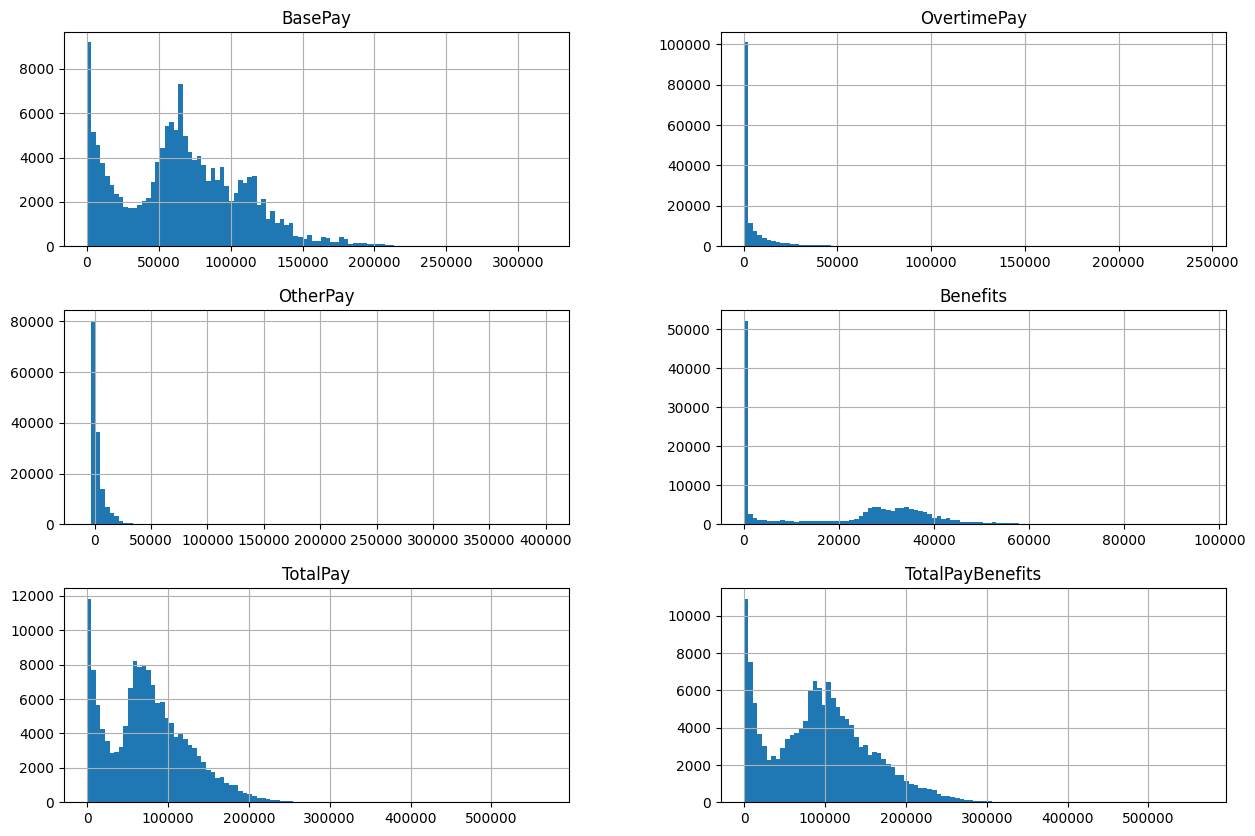

In [21]:
# C19
#-------
# Histograms to visualize the distribution of payments
#-------------------------------------------------------------
df[["BasePay",	"OvertimePay",	"OtherPay",	"Benefits",	"TotalPay",	"TotalPayBenefits"]].hist(figsize=(15,10), bins=100)

<AxesSubplot:xlabel='count', ylabel='Departments'>

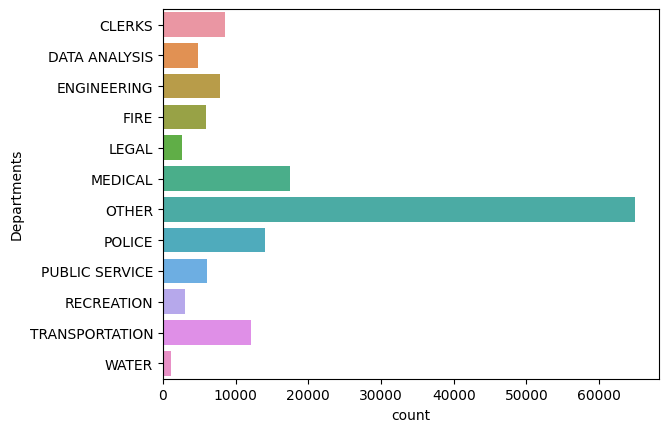

In [22]:
# C20
#-----
# Countplot or bar chart to represent the number of employees in each department
#---------------------------------------------------------------------------------
sns.countplot(data=df, y="Departments")

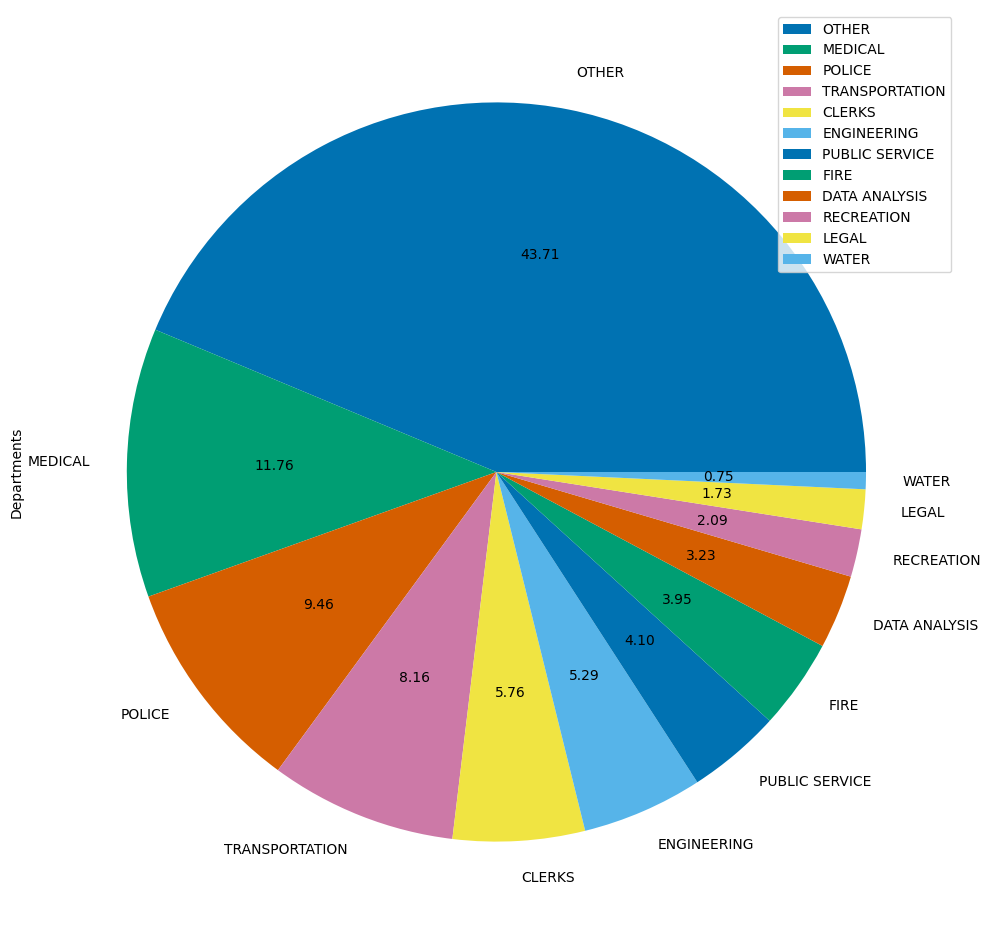

In [23]:
# C21
#------
# pie chart to represent the percentage of employees in each department
#---------------------------------------------------------------------------------
plt.style.use('seaborn-colorblind')
df["Departments"].value_counts().plot.pie(figsize=(12, 12), autopct='%.2f')
plt.legend()

# Task 5: Grouped Analysis
I conducted group analysis for the data through more than one step
1. **In (C22)**: I used `df.groupby()` to group the data by the `Year` and `Departments` columns and get the mean (average) of the `TotlaPay`(salary) column.
2. **In (C23)**: I used `pd.pivot_table()` to create a pivot table grouping the data by `Departments` as index and aggregate over `"BasePay","OvertimePay",	"OtherPay",	"Benefits",	"TotalPay",	"TotalPayBenefits"` to display the mean of each payment value for each department.
3. **In (C24)**: I created two bar plots: one to visualize the average salary per `Year` and the other per `Department`.
4. **In (C25)**: I created a big bar plot visualizing the average salary per `Department` per `Year` where each Department on the x-axis has 4 bars; one for each year.
5. **In (C26)**: I created a bar plot to visualize the average Payments (`"BasePay","OvertimePay",	"OtherPay",	"Benefits"`) in each department.
6. **In (C27)**: I created box plot to visualize the distribution of salaries grouped by Departments and view the outliers.

In [24]:
# C22
#------
# I grouped the data by the "Year" and "Departement" columns to find the average total pay in each group
#----------------------------------------------------------------------------------------------------------
df.groupby(["Year", "Departments"])["TotalPay"].mean()

Year  Departments   
2011  CLERKS             44883.955793
      DATA ANALYSIS      78867.183192
      ENGINEERING        82748.694764
      FIRE              145005.665483
      LEGAL              97081.644592
      MEDICAL            71243.705900
      OTHER              65050.173825
      POLICE            112411.753717
      PUBLIC SERVICE      8591.733647
      RECREATION         10589.115687
      TRANSPORTATION     70775.992949
      WATER              66526.071390
2012  CLERKS             47064.456287
      DATA ANALYSIS      80950.776932
      ENGINEERING        86790.657763
      FIRE              152485.397460
      LEGAL             100824.205686
      MEDICAL            73734.168969
      OTHER              68359.289592
      POLICE            112517.257178
      PUBLIC SERVICE     13153.601006
      RECREATION         11344.040386
      TRANSPORTATION     72328.995808
      WATER              66593.377757
2013  CLERKS             51734.714324
      DATA ANALYSIS      8540

In [25]:
# C23
#------
# I grouped the data by the "Departement" column to find the average Payments in each Departments
#------------------------------------------------------------------------------------------------------
pd.pivot_table(df, values=["BasePay",	"OvertimePay",	"OtherPay",	"Benefits",	"TotalPay",	"TotalPayBenefits"], index="Departments")

,BasePay,Benefits,OtherPay,OvertimePay,TotalPay,TotalPayBenefits
Departments,,,,,,
CLERKS,45732.568743,15437.284943,838.065734,903.541781,47474.176258,62911.461201
DATA ANALYSIS,81040.652879,23261.920125,776.708563,157.500558,81974.862001,105236.782126
ENGINEERING,80571.592385,22121.206910,3766.196606,3371.652525,87709.441516,109830.648426
FIRE,109598.760177,28948.448195,15721.675498,26365.376705,151685.812380,180634.260575
LEGAL,102041.909480,23769.251958,2214.607891,173.747635,104430.265006,128199.516964
MEDICAL,68485.810990,16442.883096,4715.406686,2119.836180,75321.053855,91763.936951
OTHER,63101.842754,19192.853890,2472.892942,3371.585305,68946.321001,88139.174891
POLICE,96159.816409,23610.307837,8663.473285,10151.357791,114974.647485,138584.955322
PUBLIC SERVICE,11529.962280,2712.543512,199.933409,150.368209,11880.263898,14592.807410


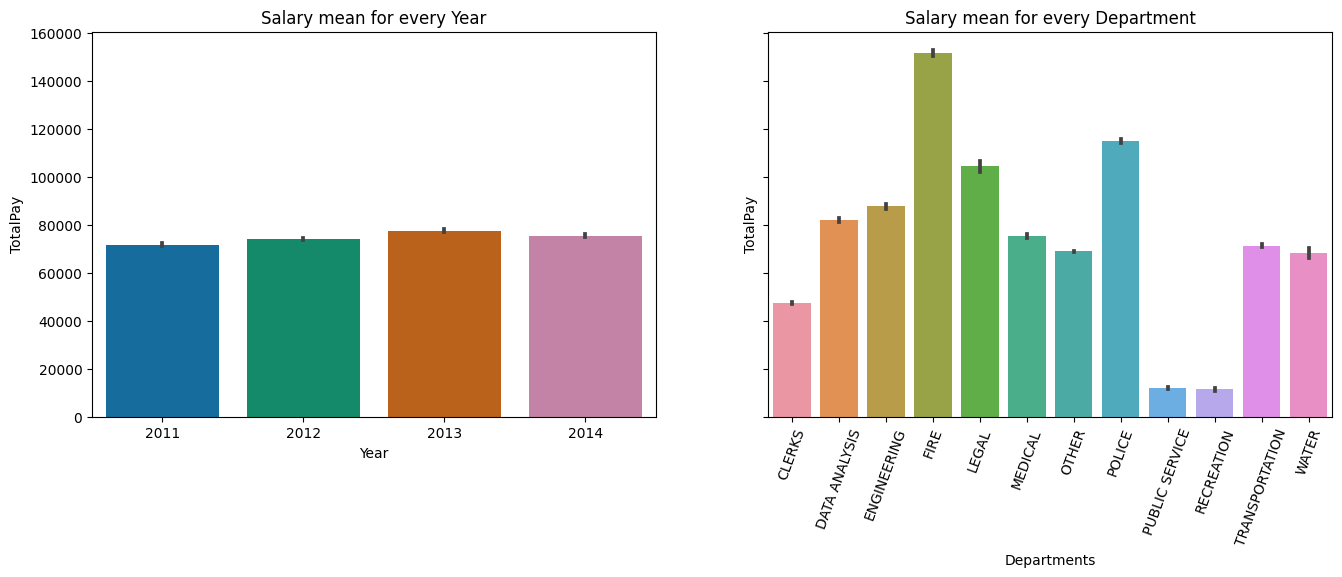

In [60]:
# C24
#------
# I created two plots visualizing salary mean grouped by year in first barPlot and salary mean grouped by department in the second
#-----------------------------------------------------------------------------------------------------------------------------------
fig, ax = plt.subplots(1,2, sharey=True)
sns.barplot(x="Year", y="TotalPay", data=df, ax=ax[0])
ax[0].set_title("Salary mean for every Year")
sns.barplot(x="Departments", y="TotalPay", data=df, ax=ax[1])
ax[1].set_title("Salary mean for every Department")
plt.xticks(rotation=70)
fig.set_size_inches(16,5)

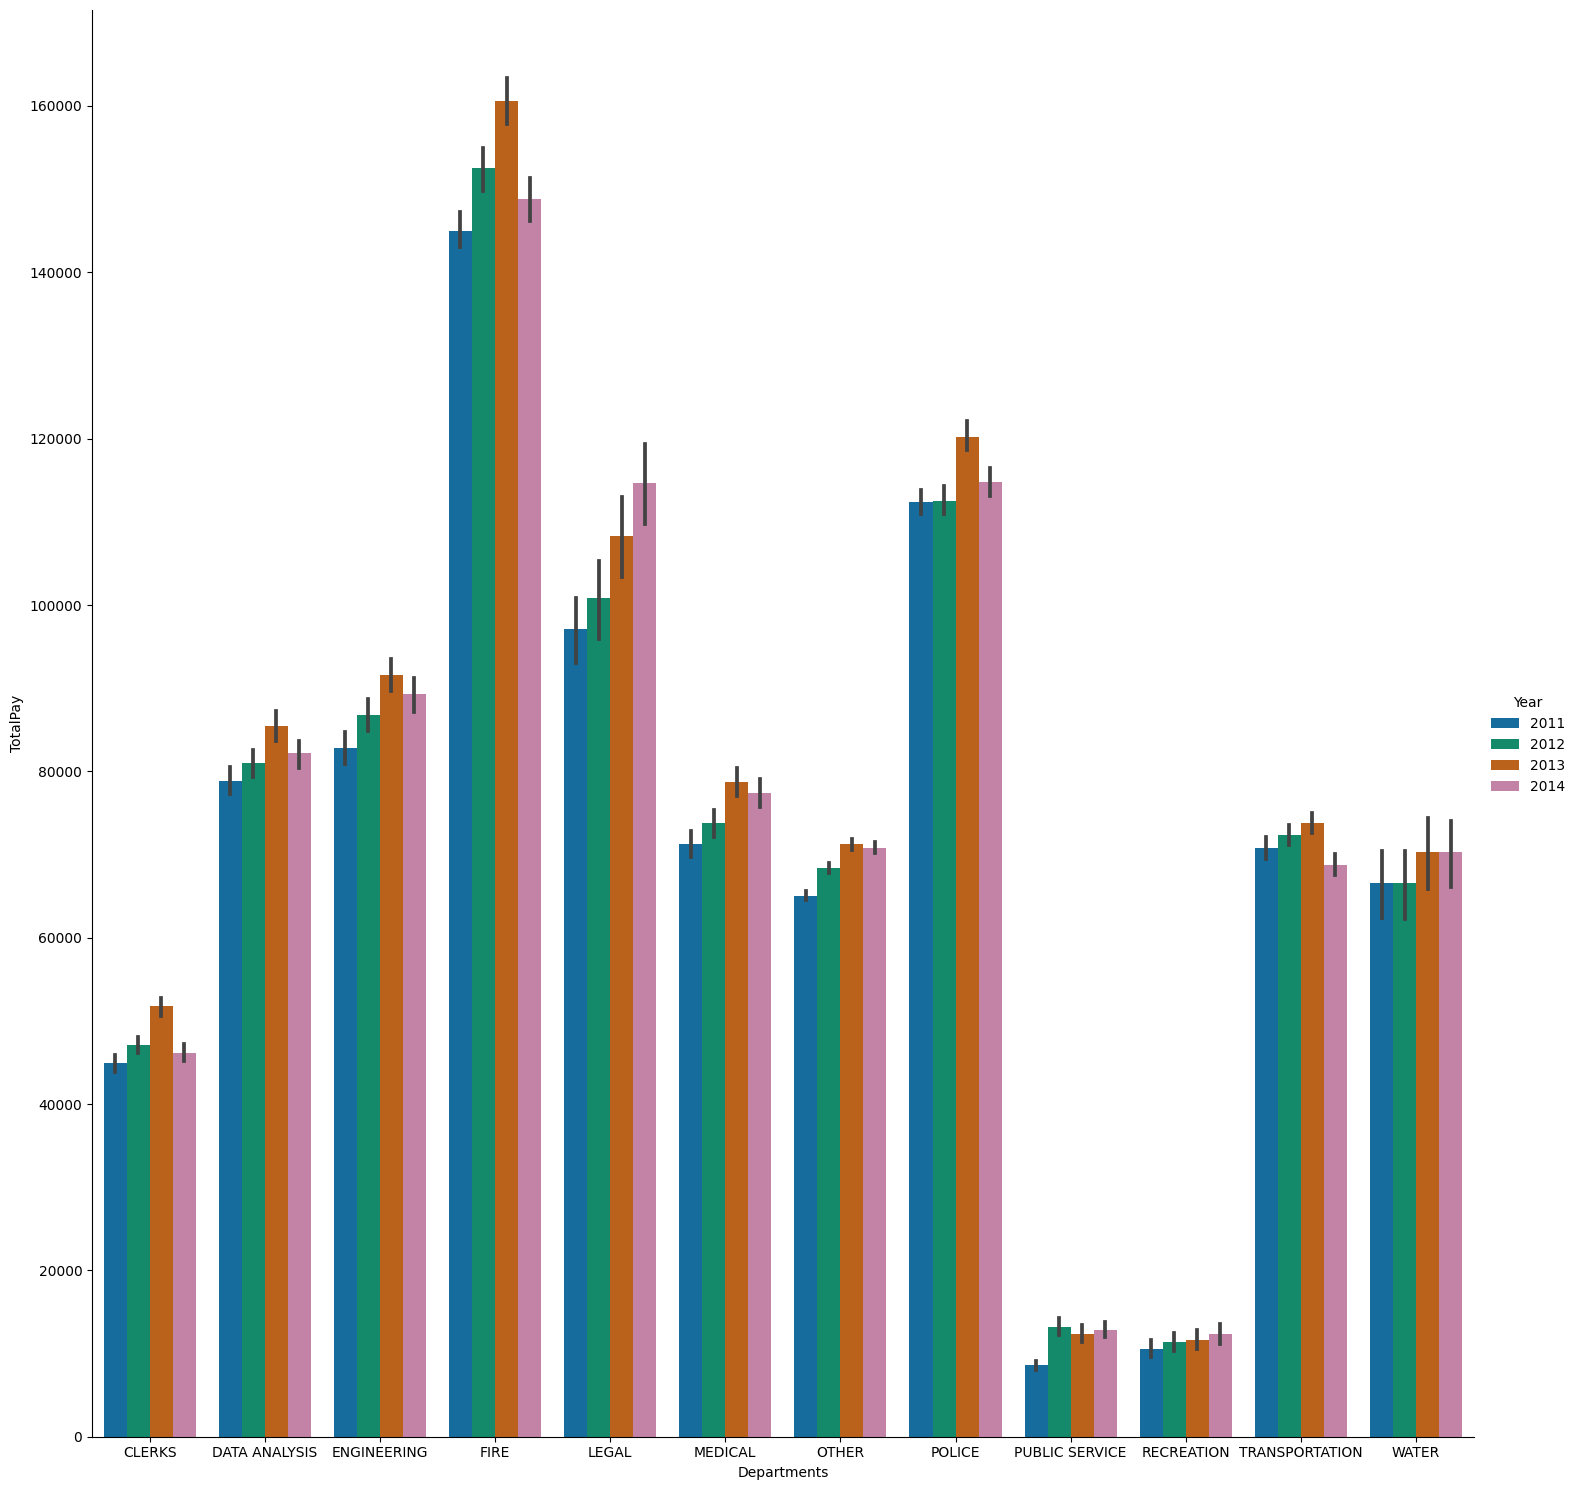

In [27]:
# C25
#------
# I grouped the data by the "Year" and "Departement" columns to plot the average total pay in each year for each department
#----------------------------------------------------------------------------------------------------------------------------
sns.catplot(x="Departments", y="TotalPay", hue="Year", kind="bar", data=df, height=15)

<AxesSubplot:xlabel='Departments'>

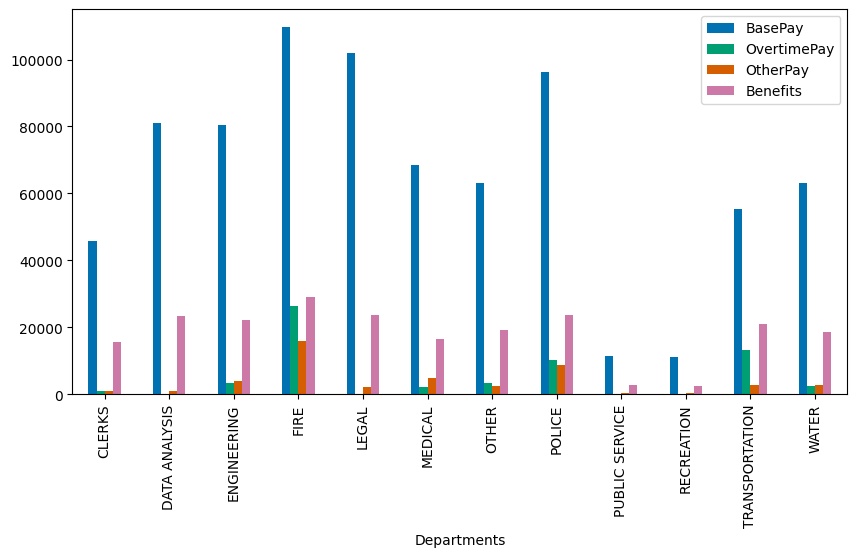

In [35]:
# C26
#------
# I created a bar plot to visualize the average Payments in each department, in other words, visualizing C23
#------------------------------------------------------------------------------------------------------------
df.groupby("Departments")[["BasePay",	"OvertimePay",	"OtherPay",	"Benefits"]].mean().plot.bar(figsize=(10,5))

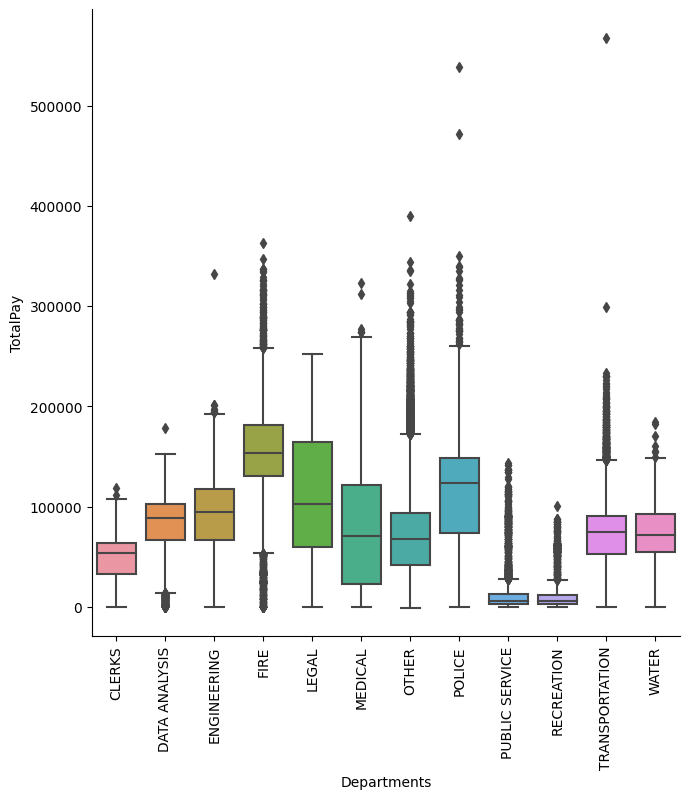

In [45]:
# C27
#------
# I created box plot to visualize the distribution of salaries grouped by Departments and view the outliers
#-----------------------------------------------------------------------------------------------------------
g = sns.catplot(x="Departments", y="TotalPay", data=df, kind="box", height=7)
plt.xticks(rotation=90)
g

# Task 6: Simple Correlation Analysis
I used `sns.heatmap()` in **(C28)** to visualize the correlation between the numerical columns of the data and deduced with the following outcomes:
- `OvertimePay`, `OtherPay`, `BasePay`, `Benefits` are not correlated to each other, however there is a moderate linear correlation between `Benefits` and `BasePay` Columns for some reason.
- There is a very strong correlation between `TotalPay` and `BasePay`, which totally expected due to the linear equation governing their relation `TotalPay = BasePay + OvertimePay + OtherPay`, however the correlation of `TotlaPay` with `OvertimePay`, `OtherPay`, and `Benefits` is moderate, this might be due to the minor contribution of each of them to the total salary
- There exists a strong correlation between `TotalPay` and `TotalPayBenefits` for the same reason mention above.

I plotted two scatter plots in **(C29)** to demonstrate the moderate linear correlation between `Benefits` and `BasePay` Columns and the strong linear correlation between `TotalPay` and `BasePay` respectively.

<AxesSubplot:>

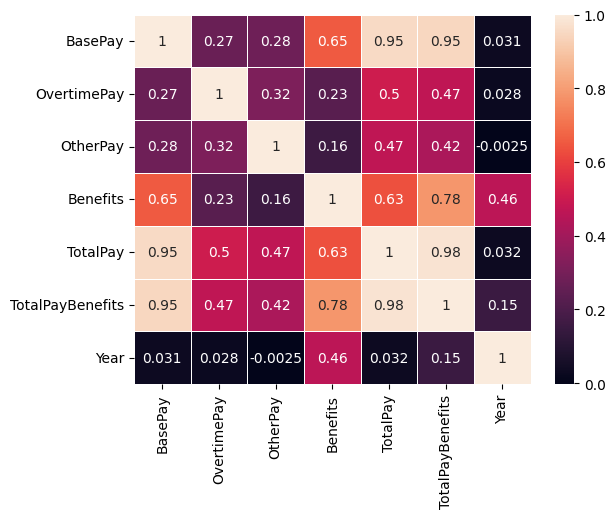

In [29]:
# C28
#------
# I used the heatmap to visualize any linear correlation between numerical columns of the data
#------------------------------------------------------------------------------------------------
display(sns.heatmap(df.corr(), annot=True, linewidths=.5))

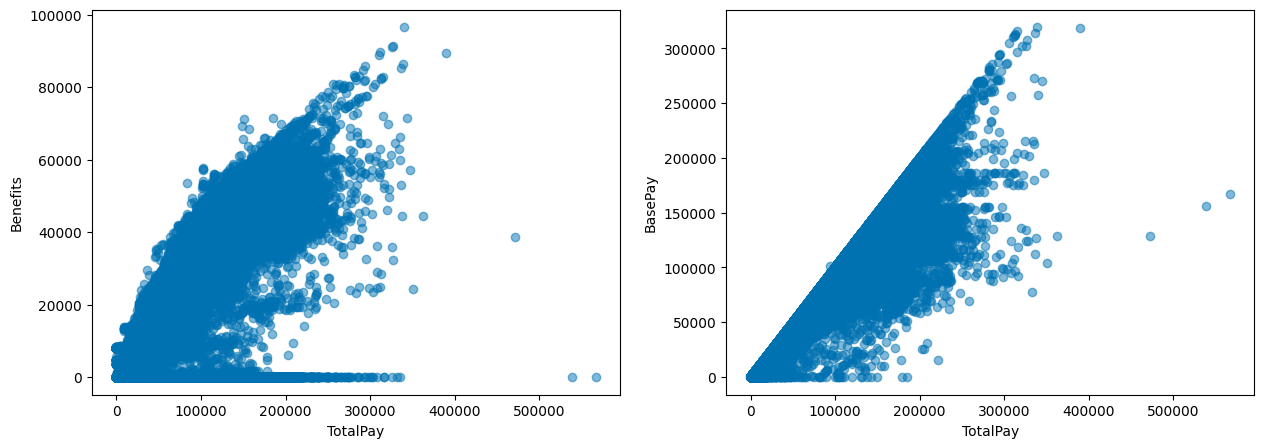

In [54]:
# C29
#------
# I plotted scatter plot for two numerical columns with "TotalPay" (salary) columns.
#--------------------------------------------------------------------------------------
fig, ax = plt.subplots(1,2)
ax[0].scatter(x=df["TotalPay"], y=df["Benefits"], alpha=0.5)
ax[0].set_xlabel("TotalPay")
ax[0].set_ylabel("Benefits")
ax[1].scatter(x=df["TotalPay"], y=df["BasePay"], alpha=0.5)
ax[1].set_xlabel("TotalPay")
ax[1].set_ylabel("BasePay")
fig.set_size_inches(15,5)

# **Task 7: Summary of Insights**
This dataset provides information about `148650 employees` with `2158 Job titles` belonging to **different departments** from `San Francisco` agency of the organization, the information are mainly about the salary and job title of each employee across years from `2011 to 2014`.

After Running some `basic summary statistics` over the data I extracted the following information about the Salaries in this dataset:
1. **Average Salary (mean)**: 74768.321972
2. **Median Salary**: 71426.610000
3. **Mode Salary**: 0
4. **Minimum Salary**: -618.13 
5. **Maximum Salary**: 567595.430000
6. **Standard deviation**: 50517.005274	

Even though there are `2158 Job titles` in this dataset, around **`56%`** of the employees work in one of the following departments: `["TRANSPORTATION", "RECREATION", "DATA ANALYSIS", "FIRE", "WATER", "POLICE", "ENGINEERING", "MEDICAL", "LEGAL", "PUBLIC SERVICE", "CLERKS"]`.

The `distribution of salaries` show that there are a lot of employees making **minimum wages** in the `San Francisco` agency, where around `31438 employees` made less than 25000 a year, however with the average salary being around 71426 the average employees are making good living.

After executing `grouped analysis` over the data I came up with the following insights:
1. across the years from `2011 to 2014` the overall average salaries `haven't fluctuated much`; ranging between around `70,000 to 75,000` with the `largest hit in 2013`.
2. looking at how the average salaries change among `different departments`, I deduced that the average salaries in `[FIRE, POLICE, LEGAL]` departments are way `above the overall average salaries` with The `FIRE department` having the top salaries at `average of 151685` followed by the `POLICE department` with `average salaries of 114974`. On the other hand, the average salaries in `[PUBLIC SERVICE, RECREATION, CLERK]` departments are way `below the overall average salaries` with `PUBLIC SERVICE` and `RECREATION` being the least.
3. In almost all the departments the `average salaries have peaked in 2013` and then `faced a drop in 2014`, however this `didn't apply to the LEGAL department` whose average salaries has been `gradually increasing from 2011 to 2014`.

Finally, after checking for `Correlation` between numerical data columns there seems to be a moderate linear correlation between the `Benefits` and `TotalPay` or `Salary`.


# Good Luck!